# CheckMySkin - EDA

## Exploring the database

In [1]:
# Import useful libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip  install plotly -q
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [2]:
# Read the file

print("Loading dataset...")
data = pd.read_csv('HAM10000_metadata.csv')
print("...Done.")
print()
data.head()

Loading dataset...
...Done.



,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
# Basics statistics

print("Number of rows : {}".format(data.shape[0]))
print()

print("Number of columns : {}".format(data.shape[1]))
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
print()
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 10015

Number of columns : 7

Basics statistics: 


,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0001863,ISIC_0031916,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN



Percentage of missing values: 



lesion_id       0.000000
image_id        0.000000
dx              0.000000
dx_type         0.000000
age             0.569146
sex             0.000000
localization    0.000000
dtype: float64

In [4]:
# Search duplicates

duplicates = data['lesion_id'].value_counts(ascending=False)
duplicates = pd.DataFrame(data=duplicates,columns=None, dtype=None, copy=None)

duplicates = duplicates.loc[duplicates['lesion_id']>1]
duplicates

,lesion_id
HAM_0001863,6
HAM_0005263,6
HAM_0003789,6
HAM_0000835,6
HAM_0007367,5
...,...
HAM_0001004,2
HAM_0002798,2
HAM_0002939,2
HAM_0000639,2


## Explore variables 

### Explore the age variable

In [5]:
data['age'].value_counts(ascending=True, dropna=False).sort_index()

0.0       39
5.0       86
10.0      41
15.0      77
20.0     169
25.0     247
30.0     464
35.0     753
40.0     985
45.0    1299
50.0    1187
55.0    1009
60.0     803
65.0     731
70.0     756
75.0     618
80.0     404
85.0     290
NaN       57
Name: age, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Distribution')

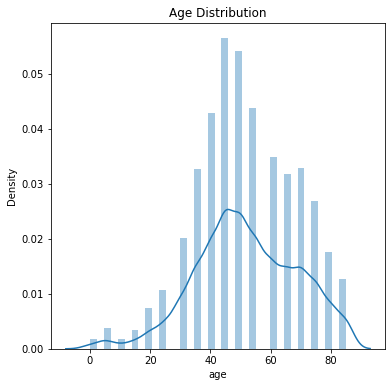

In [6]:
# Missing values are managed upstream with pandas

data.loc[:,'age'] = data['age'].fillna(data['age'].median())

# Age distribution

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.distplot(data['age'])
plt.title('Age Distribution')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

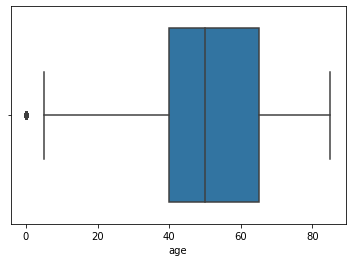

In [7]:
sns.boxplot(data['age'])

### Explore the sex variable

In [8]:
data['sex'].value_counts(ascending=False, dropna=False)

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='count'>

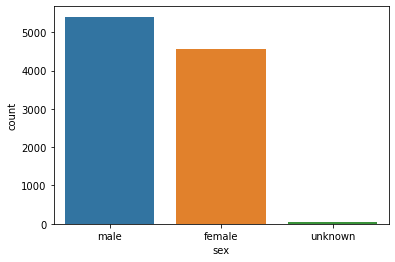

In [9]:
# Sex distribution

sns.countplot(data['sex'])

In [10]:
fig = px.pie(data, "sex", title ="Sex Distribution")
fig.show()

### Explore the localization variable

In [11]:
data['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Localization Distribution')

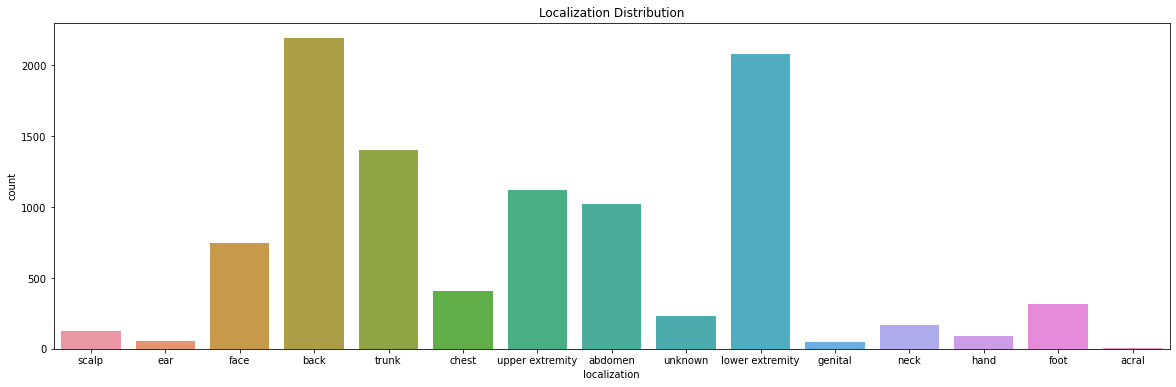

In [12]:
# Localization distribution

fig, ax = plt.subplots(figsize=(20,6))
ax = sns.countplot(data['localization'])
plt.title('Localization Distribution')

In [13]:
fig = px.pie(data, "localization")
fig.show()

localization
abdomen            48.948141
acral              37.142857
back               52.522810
chest              53.415233
ear                55.982143
face               61.651007
foot               44.717868
genital            46.770833
hand               48.111111
lower extremity    50.746269
neck               53.660714
scalp              60.117188
trunk              49.387464
unknown            46.474359
upper extremity    53.600179
Name: age, dtype: float64

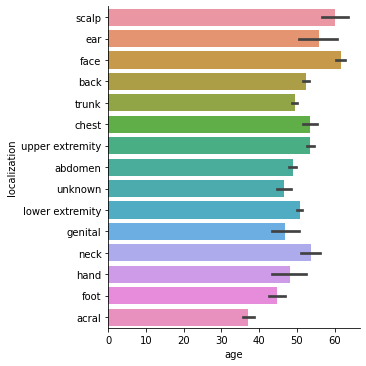

In [14]:
# Explore localization distribution according to the age

sns.catplot(y="localization", x="age", kind="bar", data=data)
data.groupby('localization')['age'].mean()

Text(0.5, 1.0, 'Localization Distribution by age and sex')

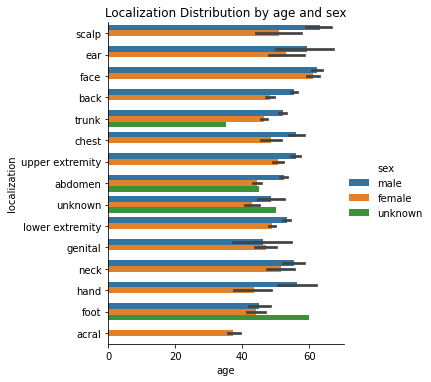

In [15]:
# Explore localization distribution according to the age and sex

ax = sns.catplot(y="localization", x="age", kind="bar", hue="sex", data=data)
plt.title('Localization Distribution by age and sex')

In [16]:
data.groupby('localization')['sex'].value_counts(ascending=False)

localization     sex    
abdomen          male        587
                 female      433
                 unknown       2
acral            female        7
back             male       1347
                 female      843
                 unknown       2
chest            male        265
                 female      142
ear              female       30
                 male         26
face             male        397
                 female      348
foot             female      173
                 male        143
                 unknown       3
genital          female       34
                 male         14
hand             female       57
                 male         33
lower extremity  female     1152
                 male        925
neck             male         95
                 female       73
scalp            male         97
                 female       31
trunk            male        763
                 female      638
                 unknown       3
unknown          f

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Localization Distribution by sex')

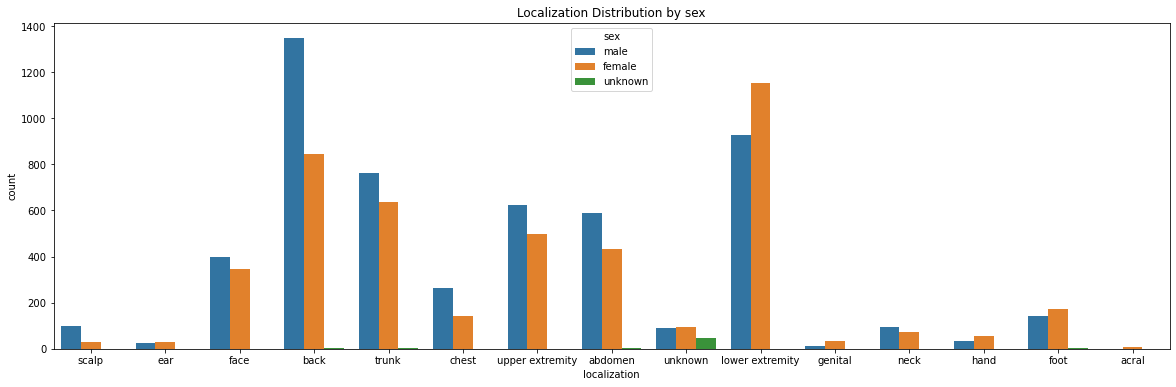

In [17]:
# Explore localization distribution according to the sex

fig, ax = plt.subplots(figsize=(20,6))
ax = sns.countplot('localization',hue='sex',data=data)
plt.title('Localization Distribution by sex')

## Explore the target

### Explore the distribution according to lesion type 

In [18]:
data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Lesion Distribution')

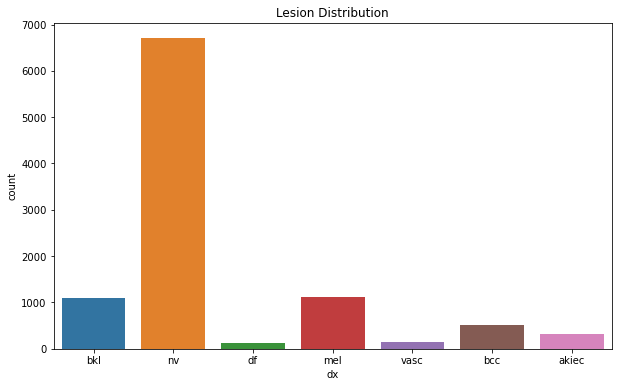

In [19]:
# Lesion Distribution

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data['dx'])
plt.title('Lesion Distribution')

In [20]:
fig = px.pie(data, "dx")
fig.show()

Text(0.5, 1.0, 'Lesion Distribution by age')

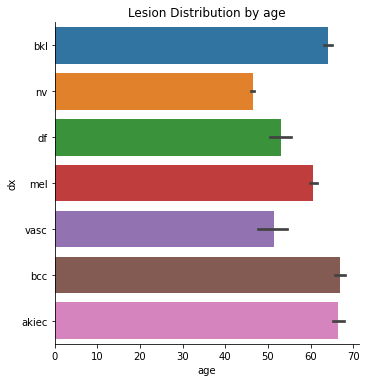

In [21]:
# Explore lesion distribution according to the age

sns.catplot(y="dx", x="age", kind="bar", data=data)
plt.title('Lesion Distribution by age')

Text(0.5, 1.0, 'Localization Distribution by age and sex')

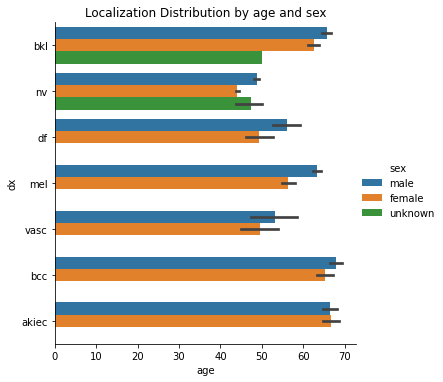

In [22]:
# Explore lesion distribution according to the age and sex

sns.catplot(y="dx", x="age", kind="bar", hue="sex", data=data)
plt.title('Localization Distribution by age and sex')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Lesion Distribution by sex')

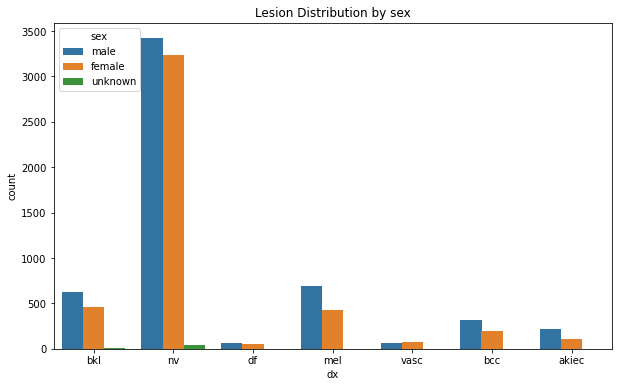

In [23]:
# Explore lesion distribution according to the sex

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot('dx',hue='sex',data=data)
plt.title('Lesion Distribution by sex')

In [24]:
data.groupby('dx')['sex'].value_counts()

dx     sex    
akiec  male        221
       female      106
bcc    male        317
       female      197
bkl    male        626
       female      463
       unknown      10
df     male         63
       female       52
mel    male        689
       female      424
nv     male       3421
       female     3237
       unknown      47
vasc   female       73
       male         69
Name: sex, dtype: int64

## Define a new target : the severity

In [25]:
# Creating new column of severity

print("Creating dict...")
severity_dict = {
    'nv': "Benign",
    'mel': "To consult",
    'bkl': "Benign",
    'bcc': "To consult",
    'akiec': 'To monitor',
    'vasc': 'To monitor',
    'df': "Benign"
}
print("...Done.")
print("Creating column...")
data['severity'] = data['dx'].map(severity_dict.get) 
print("...Done.")
data.head()

Creating dict...
...Done.
Creating column...
...Done.


,lesion_id,image_id,dx,dx_type,age,sex,localization,severity
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign


In [26]:
data['severity'].value_counts()

Benign        7919
To consult    1627
To monitor     469
Name: severity, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Lesion type distribution by severity')

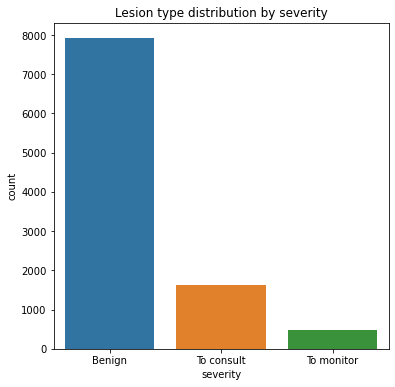

In [27]:
# Explore severity distribution 

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(data['severity'])
plt.title('Lesion type distribution by severity')

In [28]:
fig = px.pie(data, "severity")
fig.show()

Text(0.5, 1.0, 'Severity Distribution by age')

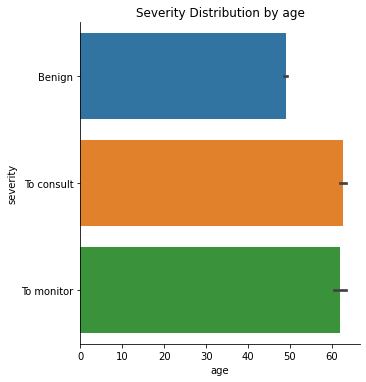

In [29]:
# Explore severity distribution according to the age

sns.catplot(y="severity", x="age", kind="bar", data=data)
plt.title('Severity Distribution by age')

Text(0.5, 1.0, 'Severity Distribution by age and sex')

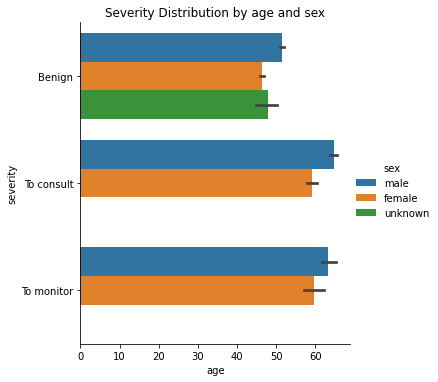

In [30]:
# Explore severity distribution according to the age and sex

sns.catplot(y="severity", x="age", kind="bar", hue="sex", data=data)
plt.title('Severity Distribution by age and sex')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Severity Distribution by sex')

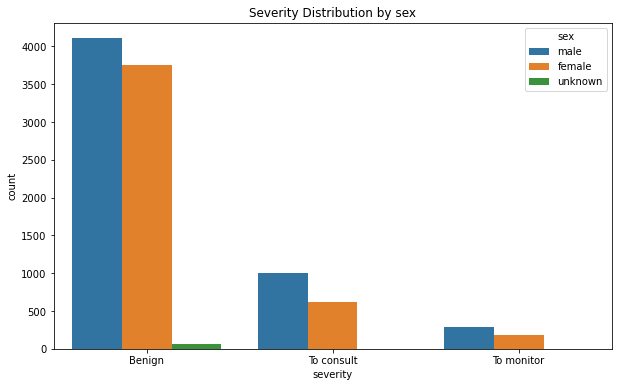

In [31]:
# Explore severity distribution according to the sex

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot('severity',hue='sex',data=data)
plt.title('Severity Distribution by sex')